## DL_Assignment_8
1. What are the pros and cons of using a stateful RNN versus a stateless RNN?
2. Why do people use Encoder–Decoder RNNs rather than plain sequence-to-sequence RNNs for automatic translation?
3. How can you deal with variable-length input sequences? What about variable-length output sequences?
4. What is beam search and why would you use it? What tool can you use to implement it?
5. What is an attention mechanism? How does it help?
6. What is the most important layer in the Transformer architecture? What is its purpose?
7. When would you need to use sampled softmax?

### Ans 1

Stateful RNNs and stateless RNNs have their own advantages and disadvantages. 

Stateful RNNs:
Pros:
1. Memory of past sequences: They retain information about previous inputs, making them suitable for tasks requiring long-term dependencies, like language modeling.
2. Efficient for online learning: Training can continue seamlessly across data sequences, preserving the model's state.

Cons:
1. Higher complexity: Maintaining state increases model complexity and memory usage.
2. Limited parallelization: Statefulness restricts parallelization during training, potentially slowing down computation.

Stateless RNNs:
Pros:
1. Simplicity: Stateless RNNs are simpler to implement and understand.
2. Easier parallelization: Stateless models allow for parallel processing, which can accelerate training on modern hardware.

Cons:
1. Limited context: They lack memory of past inputs, which can hinder performance on tasks with long dependencies.
2. Inefficient for sequential data: Stateless RNNs may struggle with sequential tasks where context matters.

The choice depends on the specific task and trade-offs between model complexity and performance requirements.


Here's a simple example of TensorFlow/Keras to illustrate the difference between a stateful and a stateless RNN. We'll use a toy sequence prediction task to demonstrate the concepts.

In this example, the stateful RNN maintains its internal state across training iterations, while the stateless RNN does not. This illustrates how the two differ in terms of state retention.

In [1]:
# Stateful RNNs
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some example data
data = np.array([0.0, 0.1, 0.2, 0.3, 0.4]).reshape(1, 5, 1)
target = np.array([0.5, 0.6, 0.7, 0.8, 0.9]).reshape(1, 5, 1)

# Create a stateful RNN model
model_stateful = Sequential()
model_stateful.add(SimpleRNN(1, batch_input_shape=(1, 5, 1), stateful=True))
model_stateful.add(Dense(1))

model_stateful.compile(optimizer='adam', loss='mean_squared_error')

# Training the stateful model
for i in range(100):
    model_stateful.fit(data, target, epochs=1, batch_size=1, shuffle=False)
    model_stateful.reset_states()

# Predict using the stateful model
predictions_stateful = model_stateful.predict(data)
print("Stateful RNN predictions:", predictions_stateful)


# Stateless RNNs
# Create a stateless RNN model
model_stateless = Sequential()
model_stateless.add(SimpleRNN(1, input_shape=(5, 1), stateful=False))
model_stateless.add(Dense(1))

model_stateless.compile(optimizer='adam', loss='mean_squared_error')

# Training the stateless model
model_stateless.fit(data, target, epochs=100, batch_size=1)

# Predict using the stateless model
predictions_stateless = model_stateless.predict(data)
print("Stateless RNN predictions:", predictions_stateless)

1/1 [==============================] - 0s 148ms/step
Stateful RNN predictions: [[0.411413]]
Epoch 1/100
1/1 [==============================] - 1s 741ms/step - loss: 0.9927
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.9874
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9822
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9769
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.9717
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9665
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9613
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.9561
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.9510
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9458
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9407
Epoch 12/100
1/1 [========================

### Ans 2

Encoder-Decoder RNNs, also known as sequence-to-sequence (Seq2Seq) models, are commonly used for automatic translation tasks, like machine translation, rather than plain sequence-to-sequence RNNs for several reasons:

1. Handling Variable-Length Sequences: Encoder-Decoder models are designed to handle input sequences of varying lengths and generate output sequences of potentially different lengths. In machine translation, sentences can have different lengths in the source and target languages, making Seq2Seq models more flexible.

2. Capturing Context: The encoder part of the model captures contextual information from the input sequence and encodes it into a fixed-length vector (the context or thought vector). This vector serves as a summary of the input sequence's information, which can then be used by the decoder to generate the output sequence. Plain Seq2Seq models may struggle with this context preservation.

3. Handling Language Variability: Machine translation involves converting text from one language to another, where languages can have vastly different grammatical structures and vocabulary sizes. Encoder-Decoder models can better adapt to these variations by learning a meaningful representation of the input.

4. Training with Teacher Forcing: Seq2Seq models can be trained using teacher forcing, where the decoder's input at each time step is the ground-truth target token from the previous step. This helps stabilize training and improve convergence, which can be challenging with plain sequence-to-sequence models.

5. Beam Search and Attention Mechanisms: Encoder-Decoder models can incorporate advanced decoding techniques like beam search and attention mechanisms. Beam search improves the quality of generated sequences, and attention mechanisms allow the model to focus on relevant parts of the source sentence during translation.

6. Handling Multi-modal Data: Beyond machine translation, encoder-decoder models are versatile and can be applied to various tasks that involve mapping input sequences to output sequences, such as image captioning, text summarization, and speech recognition.

Overall, Encoder-Decoder RNNs offer greater flexibility and better handling of the complexities of sequence-to-sequence tasks like machine translation, making them a preferred choice over plain sequence-to-sequence models.

### Ans 3

Dealing with variable-length input sequences in neural networks often involves two key strategies: padding and masking. For variable-length input sequences, padding adds placeholder values (usually zeros) to sequences, making them uniform in length to match the longest sequence in the batch. Masking is then applied during training to ignore the padded values, preventing them from affecting the model's computations. This allows the model to handle variable-length inputs.

Variable-length output sequences can be managed similarly. For tasks like machine translation, padding can be applied to target sequences. However, this approach may lead to inefficient memory usage if many tokens are padded. Alternatively, you can use techniques like "teacher forcing" during training, where the model is fed the true target tokens one step at a time, even if the target sequence is shorter. During inference, you can use decoding strategies like beam search to generate variable-length output sequences efficiently. These techniques enable neural networks to handle both variable-length input and output sequences effectively.

In this example, we pad the input sequences to a common length using `pad_sequences`, and then create a mask using the `input_mask` variable to ignore the padded values during training. The `mask_zero=True` argument in the `Embedding` layer and the `mask=input_mask` argument in the `fit` function ensure that the model handles variable-length input sequences properly.

You can adapt a similar approach for variable-length output sequences in tasks like machine translation, but it requires specific handling during the decoding phase, which may involve beam search or other techniques for efficient generation.

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6915
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 0.6898
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 0.6880
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 0.6863
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 0.6845


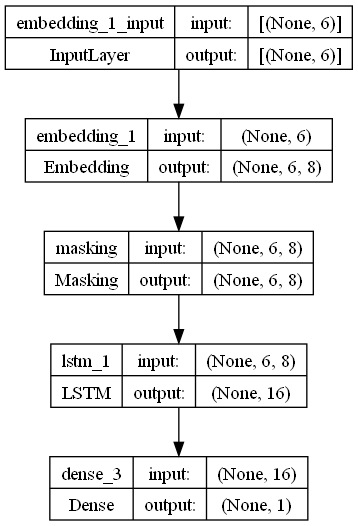

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Sample variable-length input sequences
input_sequences = [
    [3, 1, 4, 1],
    [2, 7, 1],
    [9, 2, 5, 6, 5, 3],
]

# Pad input sequences to a common length
max_seq_length = max(len(seq) for seq in input_sequences)
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='post')

# Create a mask to ignore padded values during training
input_mask = (padded_input_sequences != 0)

# Define a simple RNN model with masking
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=8, input_length=max_seq_length, mask_zero=True))
model.add(Masking(mask_value=0.0))  # Add a masking layer
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Sample binary labels for training
labels = np.array([1, 0, 1])

# Train the model
history = model.fit(padded_input_sequences, labels, epochs=5)

# Plot the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model.png')

### Ans 4

**Beam search** is a search algorithm commonly used in sequence generation tasks, such as natural language processing and machine translation. It is used to find the most likely sequence of outputs from a generative model, like a neural network-based language model or a sequence-to-sequence model.

**How it works**:

1. **Initialization**: Beam search starts with an initial sequence, often just a starting token.

2. **Expansion**: At each step, the algorithm expands the current set of sequences by considering multiple possible next tokens. For each sequence in the current set, it generates several candidate sequences by sampling the next token from the model's output distribution. This process is repeated for each sequence, resulting in a set of candidates.

3. **Scoring**: Each candidate sequence is assigned a score based on the likelihood of the generated tokens. This score usually considers the probabilities of the generated tokens and may include length normalization to prevent very short or very long sequences from dominating.

4. **Selection**: The top-k sequences with the highest scores are selected to continue the search. The parameter "k" is called the beam width and controls how many candidates are retained at each step.

5. **Termination**: The process continues until a predefined termination condition is met, such as reaching a maximum sequence length or generating an end-of-sequence token.

**Why use beam search**:

- **Improved quality**: Beam search typically produces higher-quality sequences compared to greedy decoding, as it explores multiple possible sequences instead of simply choosing the most likely token at each step.

- **Diverse outputs**: By keeping multiple sequences in consideration, beam search can generate more diverse and creative outputs.

- **Controlled sequence length**: You can control the length of generated sequences more effectively compared to greedy decoding.

**Tools for implementation**:

Beam search can be implemented using various programming languages and deep learning frameworks like Python with TensorFlow or PyTorch. You can implement it manually, but many deep learning libraries provide built-in support for beam search as part of their sequence generation APIs. For example, TensorFlow and PyTorch offer beam search implementations that you can use with sequence-to-sequence models or language models. Additionally, the Hugging Face Transformers library provides beam search implementations for various pre-trained language models, making it easy to use in NLP applications.

In [1]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, set_seed

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2-medium"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set a seed for reproducibility
set_seed(42)

# Function to generate text using beam search
def generate_beam_search(prompt, num_return_sequences=3, max_length=50, beam_width=5):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    
    # Set pad_token_id to None to suppress the warning
    model.config.pad_token_id = None
    
    # Create an attention mask
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device)
    
    # Generate text using beam search
    beam_output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        num_beams=beam_width,
        early_stopping=True,
    )
    
    return [tokenizer.decode(output, skip_special_tokens=True) for output in beam_output]

# Generate text using beam search with different prompts
prompts = [
    "Once upon a time",
    "In a galaxy far, far away",
    "The quick brown fox",
]

for prompt in prompts:
    generated_sequences = generate_beam_search(prompt, num_return_sequences=3, max_length=100, beam_width=5)

    # Print the generated sequences
    print(f"Prompt: {prompt}")
    for i, sequence in enumerate(generated_sequences):
        print(f"Generated Sequence {i+1}:")
        print(sequence)
        print("\n")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Once upon a time
Generated Sequence 1:
Once upon a time, there was a man who lived in a small village near the sea. He had a beautiful wife and two beautiful daughters. One of his daughters was very beautiful, and he loved her very much. The other daughter, however, was not so kind to her father. She wanted to marry him, but she was afraid that if she did so, she would not be able to bear him any more. So, the man decided that he would give his daughter to another man,


Generated Sequence 2:
Once upon a time, there was a man who lived in a small village near the sea. He had a beautiful wife and two beautiful daughters. One of his daughters was very beautiful, and he loved her very much. The other daughter, however, was not so kind to her father. She wanted to marry him, but she was afraid that if she did so, she would not be able to bear him any more. So, the man decided that he would marry the daughter of the woman who


Generated Sequence 3:
Once upon a time, there was a man

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: In a galaxy far, far away
Generated Sequence 1:
In a galaxy far, far away, there is a planet called Earth. It is the only planet in the solar system that has not been colonized by alien species.

Earth has a population of about one billion people, and it is surrounded by a vast expanse of ocean. The planet's surface is covered in forests, mountains, deserts, lakes, rivers, oceans and oceans of ice. Earth's atmosphere is made up of carbon dioxide, nitrogen, oxygen, methane and water vapor.


Generated Sequence 2:
In a galaxy far, far away, there is a planet called Earth. It is the only planet in the solar system that has not been colonized by alien species.

Earth has a population of about one billion people, and it is surrounded by a vast expanse of ocean. The planet's surface is covered in forests, mountains, deserts, lakes, rivers, oceans and oceans of ice. Earth's atmosphere is made up of carbon dioxide, nitrogen, oxygen, water vapor, methane,


Generated Sequence 3:
In a ga

### Ans 5

An attention mechanism is a vital component in artificial neural networks, particularly in deep learning models such as Transformers. It helps improve the model's ability to focus on relevant information within a large dataset or sequence of data. 

The mechanism functions by assigning varying levels of importance or attention to different parts of the input data, enabling the model to prioritize relevant features or context. This selective attention mechanism enhances the model's understanding of relationships and dependencies within the data, leading to better performance in tasks like machine translation, natural language processing, and image recognition. By dynamically adapting its focus, an attention mechanism enables the network to capture long-range dependencies and contextual information, ultimately enhancing its ability to make accurate predictions and solve complex problems.

In this code, we define a simple self-attention mechanism using linear layers for query, key, and value projections. We then apply this mechanism to a randomly generated input tensor and visualize the attention scores as a heatmap using the Seaborn library. This provides a visual representation of how the attention mechanism assigns importance to different parts of the input sequence.

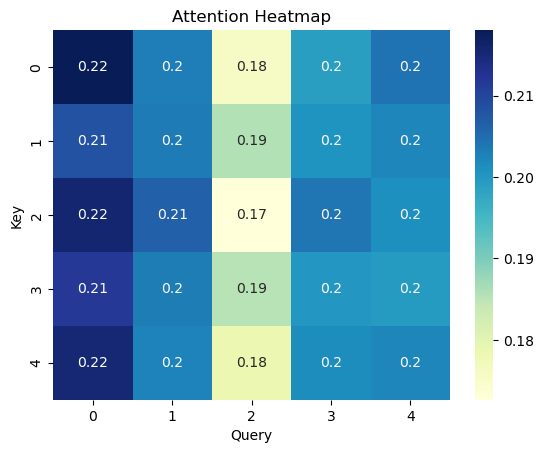

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Define a simple self-attention mechanism
class SelfAttention(torch.nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        self.W_q = torch.nn.Linear(input_dim, input_dim)
        self.W_k = torch.nn.Linear(input_dim, input_dim)
        self.W_v = torch.nn.Linear(input_dim, input_dim)

    def forward(self, x):
        q = self.W_q(x)
        k = self.W_k(x)
        v = self.W_v(x)

        attn_scores = torch.matmul(q, k.transpose(1, 2)) / torch.sqrt(torch.tensor(x.size(-1)).float())  # Fix the sqrt argument
        attn_probs = F.softmax(attn_scores, dim=-1)
        attended_values = torch.matmul(attn_probs, v)

        return attended_values, attn_probs

# Create a sample input tensor
input_tensor = torch.rand(1, 5, 10)  # Batch size of 1, sequence length of 5, input dimension of 10

# Apply self-attention
attention_layer = SelfAttention(input_dim=10)
attended_values, attn_probs = attention_layer(input_tensor)

# Plot the attention scores as a heatmap
sns.heatmap(attn_probs.squeeze().detach().numpy(), annot=True, cmap="YlGnBu")
plt.title("Attention Heatmap")
plt.xlabel("Query")
plt.ylabel("Key")
plt.show()

### Ans 6

The most important layer in the Transformer architecture is the "Multi-Head Self-Attention" layer. Its primary purpose is to enable the model to capture complex and long-range dependencies within a sequence of data, making Transformers highly effective in various natural language processing and sequence-to-sequence tasks.

The Multi-Head Self-Attention layer works by computing attention scores between all positions in the input sequence, allowing the model to weigh the importance of each element when processing another. It does this multiple times in parallel with different learned projections, or "heads." This multi-head mechanism enables the model to focus on different aspects of the input sequence simultaneously, capturing both local and global relationships. Additionally, it helps the model handle sequences of varying lengths, making it highly adaptable.

By attending to relevant context, the Self-Attention layer fosters context-aware embeddings, which are crucial for tasks like translation, sentiment analysis, and text generation. Its effectiveness in modeling sequential relationships has made Transformers a groundbreaking architecture in natural language understanding and generation tasks.

In this code, we define a multi-head self-attention layer and apply it to a sample input sequence. We then visualize the attention weights for a single head using a heatmap, showing how the model assigns importance to different positions in the input sequence when processing a query.

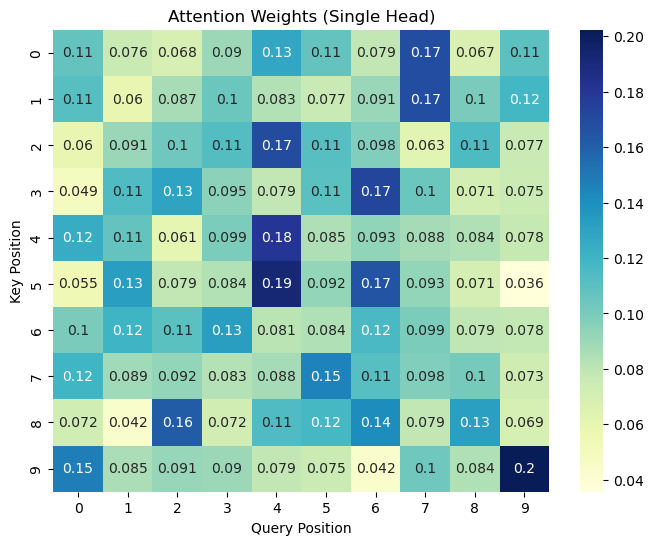

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# Define the multi-head self-attention layer
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear projections for queries, keys, and values for each head
        self.wq = nn.Linear(embed_dim, embed_dim)
        self.wk = nn.Linear(embed_dim, embed_dim)
        self.wv = nn.Linear(embed_dim, embed_dim)

    def forward(self, query, key, value, mask=None):
        # Split the input into multiple heads
        batch_size = query.size(0)
        query = self.wq(query).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = self.wk(key).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = self.wv(value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        # Compute scaled dot-product attention
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attn_weights = torch.nn.functional.softmax(scores, dim=-1)
        output = torch.matmul(attn_weights, value)

        return output, attn_weights

# Create a sample input sequence
seq_length = 10
embed_dim = 64
num_heads = 4
input_sequence = torch.randn(1, seq_length, embed_dim)  # Batch size of 1

# Apply multi-head self-attention
attention_layer = MultiHeadAttention(embed_dim, num_heads)
output_sequence, attn_weights = attention_layer(input_sequence, input_sequence, input_sequence)

# Plot the attention weights for a single head
plt.figure(figsize=(8, 6))
sns.heatmap(attn_weights.squeeze().detach().numpy()[0], annot=True, cmap="YlGnBu")
plt.title("Attention Weights (Single Head)")
plt.xlabel("Query Position")
plt.ylabel("Key Position")
plt.show()

### Ans 7

Sampled softmax is typically used in scenarios where the output space of a softmax operation is very large, making the computation of a full softmax infeasible due to memory or time constraints. It is commonly employed in natural language processing tasks, particularly when dealing with large vocabularies in language modeling or neural machine translation. Here are some situations where you might need to use sampled softmax:

1. **Large Vocabulary**: When working with a natural language dataset with a vast vocabulary (e.g., tens of thousands or more words), computing the full softmax over all possible output tokens is extremely computationally expensive. Sampled softmax can efficiently approximate the softmax, speeding up training and inference.

2. **Training Efficiency**: Sampled softmax is often used in training language models to accelerate the learning process. By randomly sampling a small subset of the output vocabulary during training, it reduces the number of computations required for each training step.

3. **Low-Resource Scenarios**: In low-resource languages or tasks where the training data is limited, using a full softmax may result in a model that overfits or has poor generalization. Sampled softmax helps in such scenarios by preventing overfitting.

4. **Hierarchical Models**: Some models, like hierarchical softmax, use a tree structure to represent the output vocabulary. Sampled softmax can be used to efficiently traverse this tree and compute probabilities.

5. **Online Inference**: During inference, especially in real-time applications like chatbots, sampled softmax can be valuable for reducing latency by avoiding the computation of the full softmax over a large vocabulary.

It's important to note that while sampled softmax can be a practical solution in these situations, it introduces an approximation error because it doesn't consider all possible output tokens. The choice to use it should be carefully considered based on the specific requirements of your task and available computational resources.